<a href="https://colab.research.google.com/github/pks98/Pracfiles/blob/main/Function_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Considering only age and fare column

In [4]:
df['age']=df['age'].fillna(df['age'].mean())

In [5]:
df=df[['age','fare','survived']]

In [6]:
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


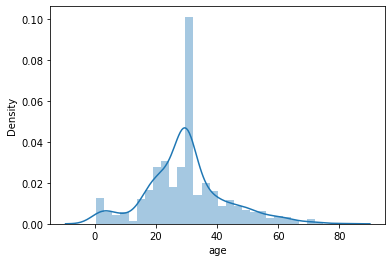

In [7]:
sns.distplot(df['age'])

Age is close to normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


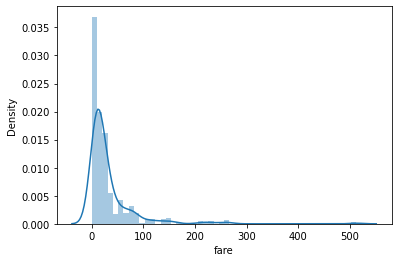

In [8]:
sns.distplot(df['fare'])

Fare is right skewed and idicates most of the people were travelling with less fare price

In [9]:
x=df.drop('survived',axis=1)
y=df['survived']

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [25]:
x_train.shape,x_test.shape

((712, 2), (179, 2))

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [27]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()

In [28]:
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("LogisticRegression: ",accuracy_score(y_test,pred))

LogisticRegression:  0.6480446927374302


In [29]:
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print("DecisionTree: ",accuracy_score(y_test,pred))

DecisionTree:  0.6536312849162011


Above are accuracy of the model without applying any transformation

# Applying the transformation on both the column

In [30]:
from sklearn.preprocessing import FunctionTransformer

t=FunctionTransformer(func=np.log1p)

x_train_transformed=t.fit_transform(x_train)
x_test_transformed=t.transform(x_test)

lr.fit(x_train_transformed,y_train)
pred=lr.predict(x_test_transformed)
print("LogisticRegression: ",accuracy_score(y_test,pred))

dt.fit(x_train_transformed,y_train)
pred=dt.predict(x_test_transformed)
print("DecisionTree: ",accuracy_score(y_test,pred))

LogisticRegression:  0.6983240223463687
DecisionTree:  0.6815642458100558


The accuracy of the model has been improved after transformation

To confirm the improvement of the accuracy of the model we are using the cross_val_score

In [31]:
from sklearn.model_selection import cross_val_score

x_transformed = t.fit_transform(x)

print("LogisticRegession: ",np.mean(cross_val_score(lr,x_transformed,y,scoring='accuracy',cv=10)))
print("DecisoinTree: ",np.mean(cross_val_score(dt,x_transformed,y,scoring='accuracy',cv=10)))


LogisticRegession:  0.678027465667915
DecisoinTree:  0.6577528089887641


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution after transformation')

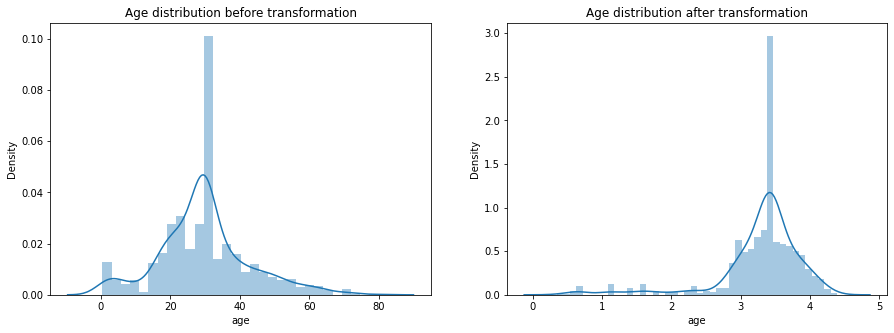

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.distplot(df['age'])
plt.title('Age distribution before transformation')

plt.subplot(122)
sns.distplot(x_transformed['age'])
plt.title('Age distribution after transformation')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare distribution after transformation')

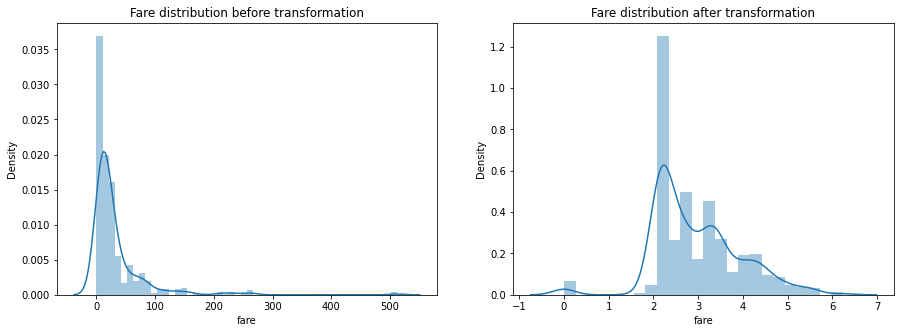

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.distplot(df['fare'])
plt.title('Fare distribution before transformation')

plt.subplot(122)
sns.distplot(x_transformed['fare'])
plt.title('Fare distribution after transformation')

Applying the tranformation only on the fare column

In [40]:
from sklearn.compose import ColumnTransformer

trf=ColumnTransformer(transformers=[
                                 ('t1',FunctionTransformer(func=np.log1p),['fare'])   
],remainder='passthrough')

xtrain_t=trf.fit_transform(x_train)
xtest_t=trf.transform(x_test)

lr.fit(xtrain_t,y_train)
pred=lr.predict(xtest_t)
print("LogisticRegression: ",accuracy_score(y_test,pred))

dt.fit(xtrain_t,y_train)
pred=dt.predict(xtest_t)
print("DecisionTree: ",accuracy_score(y_test,pred))


LogisticRegression:  0.6759776536312849
DecisionTree:  0.659217877094972


In [42]:
x_trns=trf.fit_transform(x)

print("LogisticRegession: ",np.mean(cross_val_score(lr,x_trns,y,scoring='accuracy',cv=10)))
print("DecisoinTree: ",np.mean(cross_val_score(dt,x_trns,y,scoring='accuracy',cv=10)))


LogisticRegession:  0.6712609238451936
DecisoinTree:  0.6644694132334581
